In [1]:
%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
#import corner
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode

In [2]:
def Prior(p):
    return np.piecewise( p, [p>= 0 and p <= 1, p<0 and p > 1], [lambda p: 1, lambda p:0])

In [3]:
Prior = np.vectorize(Prior)
Prior(0.5)

array(1.)

In [4]:
def Likelihood(p,r,n):
    return p**r*(1-p)**(n-r)

In [5]:
Likelihood(0.5,4,10)

0.0009765625

In [6]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [7]:
# El mundo de los modelos
p = np.linspace(0,1,100)
r = 4
n = 10
Pos = Posterior(p,r,n)

<IPython.core.display.Javascript object>


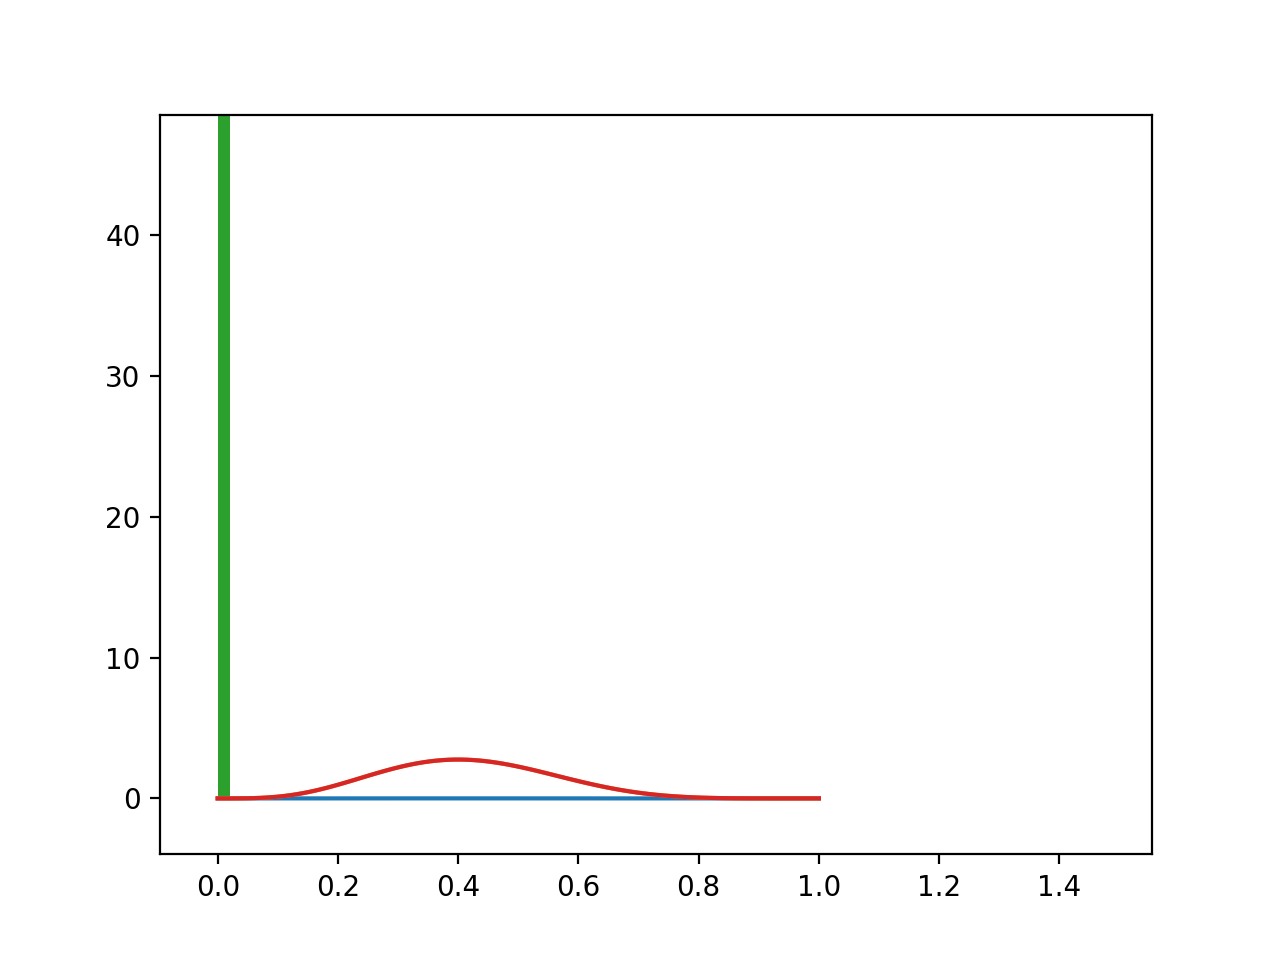

In [8]:
plt.plot(p,Pos)

In [9]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
I

0.00043290043290043285

In [10]:
plt.plot(p,Pos/I)

In [11]:
def Metropolis(x0, Posterior, NSteps=int(1e4), delta = 0.4):
    x = np.zeros((NSteps, 1))
    x[0] = x0 #prior
    
    for i in tqdm(range(1,NSteps)):
        P0 = Posterior(x[i-1], r, n)
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        P1 = Posterior(x[i-1], r, n)
        
        alpha = np.minimum(1, P1/P0)
        g = np.random.rand()
        
        if alpha>g:
            x[i,0] = xf
        else: 
            x[i,:] = x[i-1,:]
        return x[100:,:]

In [12]:
initparams = np.array([0.2])
MCMC = Metropolis(initparams, Posterior)

  0%|                                                  | 0/9999 [00:00<?, ?it/s]


In [13]:
plt.hist(MCMC, density=True, bins=50)
plt.plot(p, Pos/I)

In [ ]:
#hipotesis velocidad de la tierra es cero, hasta donde se puede decir